# Week 7 - Optimization

In [4]:

import numpy as np
import matplotlib.pyplot as plt


Machine learning often relies on the concept of learning, which is performed using optimization algorithms. One of the most popular optimization methods is Gradient Descent. Another approach, though less commonly used, is Newton's Method.  


### Gradient Descent  
Gradient Descent is described by the update rule:  

$$
\mathbf{w} \leftarrow \mathbf{w} - \eta \nabla J(\mathbf{w})
$$  

It is a **first-order** optimization method, meaning it uses only gradient information. $\nabla J(\mathbf{w})$ is the gradient of the cost function $J(\mathbf{w})$ with respect to the weights $\mathbf{w}$, and $\eta$ is the learning rate.


### Newton's Method  
Newton's Method incorporates **second-order** information via the Hessian matrix. Its update rule is:  

$$
\mathbf{w} \leftarrow \mathbf{w} - \mathbf{H}^{-1}\nabla J(\mathbf{w})
$$  

where:  
- $\mathbf{H}$ is the Hessian matrix of $J(\mathbf{w})$  

**Key Properties:**  
- Fewer iterations needed for convergence (vs. first-order methods)  
- Computationally expensive (Hessian calculation and inversion)  
- $\mathbf{H}^{-1}$ scales and rotates the gradient for better descent direction
### Minimized function
The function we aim to minimize is:  

$$
f(x_1, x_2) = 2\cosh(x_1) + \cosh(x_2) + \cosh(0.1x_1x_2)
$$  

For this function:  
- The gradient consists of two elements.  
- The Hessian is a $2 \times 2$ matrix, containing four elements.  

In [15]:

EPS = 0.001

def func(x1,x2):
    z = 2*np.cosh(x1) + np.cosh(x2) + np.cosh(0.1*x1*x2)
    return z


def func_grad(x1, x2):
    grad = np.array([2*np.sinh(x1) + 0.1 * x2 * np.sinh(0.1 * x1 * x2), np.sinh(x2) +  0.1 * x1*np. sinh(0.1* x1 *x2)])
    return grad

def func_hessian(x1, x2):
    hessian = np.array([[0.01*x2**2*np.cosh(0.1*x1*x2)+2*np.cosh(x1), 0.1*np.sinh(0.1*x1*x2) + 0.01*x1*x2*np.cosh(0.1*x1*x2)], 
                        
                        [0.1 * np.sinh(0.1 * x1 * x2) + 0.01 * x1 * x2 * np.cosh(0.1 * x1 * x2), 0.01 * x1**2 * np.cosh(0.1 * x1 * x2) + np.cosh(x2)]])
    return hessian

def draw_function():
  
    x = np.linspace(-2, 4.5, 100)
    y = np.linspace(-2, 4.5,  100)
    X, Y = np.meshgrid(x, y)
    Z = func(X,Y)
    plt.pcolormesh(X, Y, Z, cmap='viridis')
    plt.colorbar()
    plt.contour(X,Y,Z)
    plt.xlabel('x1')
    plt.ylabel('x2')

def gradient_descent():
    X = np.array([4,4])
    lr = 0.03
    solutions = np.copy(X)[:, np.newaxis]
    func_values = [func(X[0], X[1])]
    for i in range(500):
        X = X - lr*func_grad(X[0], X[1])
        solutions = np.concatenate((solutions, X[:,np.newaxis]), axis= 1)
        func_values.append(func(X[0], X[1]))
        if np.abs(func_values[-1]-func_values[-2]) < EPS:
            print(f'Gradient descent number of iterations: {i}')
            break

    draw_function()
    plt.plot(solutions[0,:], solutions[1,:], label='Gradient descent')
    plt.scatter(solutions[0,:], solutions[1,:],s=4 )
    plt.title('Gradient descent')

def newtons_method():
    X = np.array([4,4])
    lr = 0.5
    solutions = np.copy(X)[:, np.newaxis]
    func_values = [func(X[0], X[1])]
    for i in range(500):
        X = X - np.dot(np.linalg.inv(func_hessian(X[0], X[1])), func_grad(X[0], X[1]))
        solutions = np.concatenate((solutions, X[:,np.newaxis]), axis= 1)
        func_values.append(func(X[0], X[1]))
        if np.abs(func_values[-1]-func_values[-2]) < EPS:
            print(f'Newtons methods number of iterations: {i}')
            break
    
    plt.plot(solutions[0,:], solutions[1,:], label='Newton\'s method')
    plt.scatter(solutions[0,:], solutions[1,:], )
    plt.legend()
    plt.title('Newton\'s method')



Gradient descent number of iterations: 77
Newtons methods number of iterations: 5


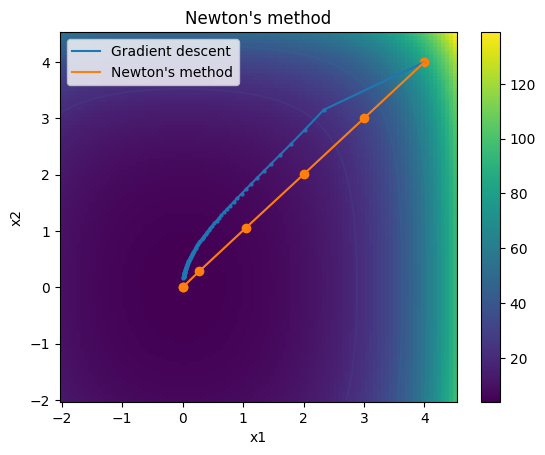

In [14]:

gradient_descent()
newtons_method()
plt.show(block=True)






